# Objetivo: construir u(x,t) a partir dos modos de vibração. 

Lembrando que o ansatz é dado por $$u(x,t)  = \psi (x) e^{i\omega t} $$

Pelos códigos anteriores, obtemos os autovetores $\psi(x)$. A parte real dessa função é $$u(x,t)  = Re[\psi (x)] cos(\omega t) $$


Foi criado também um loop for para plotar os gráficos e os respectivos gifs para cada modo normal. Para isso, foi utilizada a função ```uptade``` para criar a animação, superpondo a envoltória positiva e negativa. Isso foi feito a partir do index dos autovetores associados : autovetores[:, 0] (primeiro modo), autovetores[:, 1] (segundo modo).

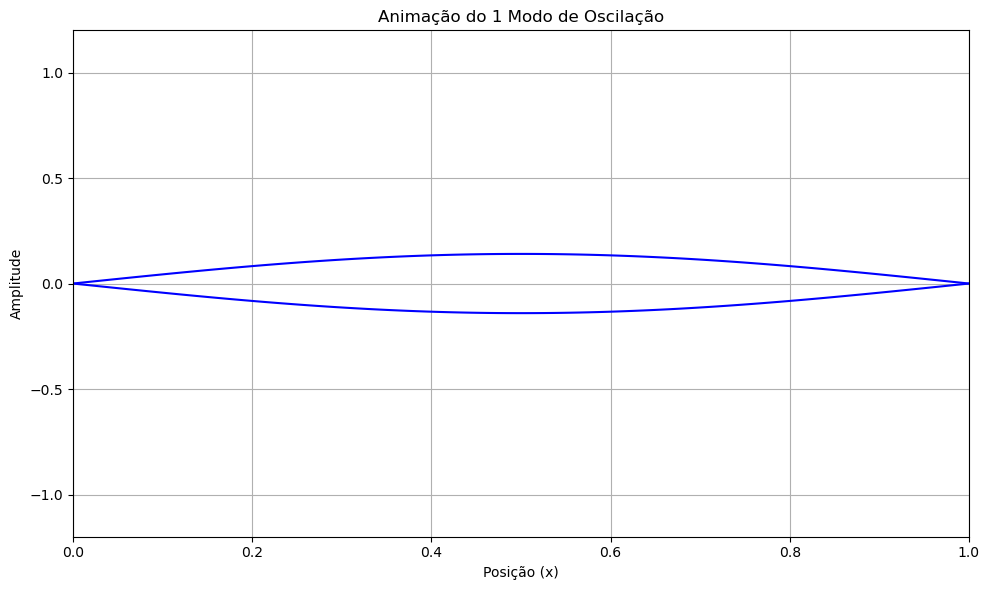

Frequência angular (ω) do 1 modo: 3.1415 rad/s
Período de oscilação: 2.0001 s


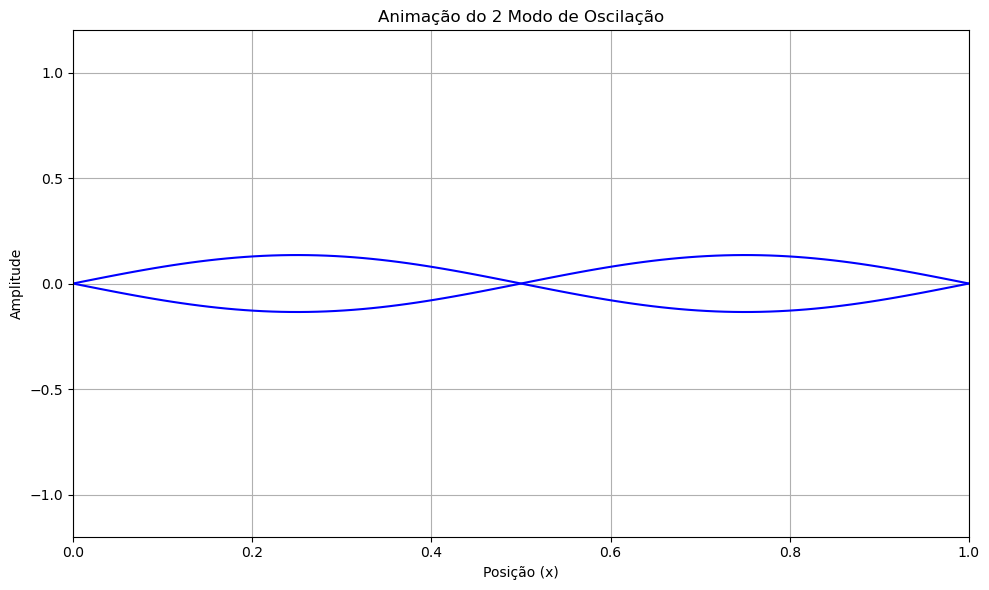

Frequência angular (ω) do 2 modo: 6.2821 rad/s
Período de oscilação: 1.0002 s


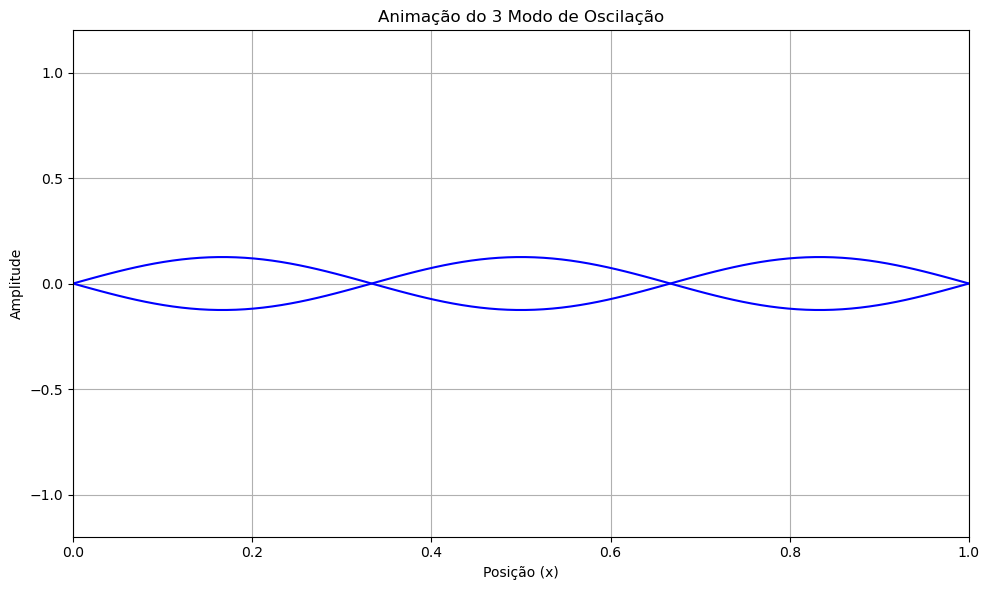

Frequência angular (ω) do 3 modo: 9.4212 rad/s
Período de oscilação: 0.6669 s


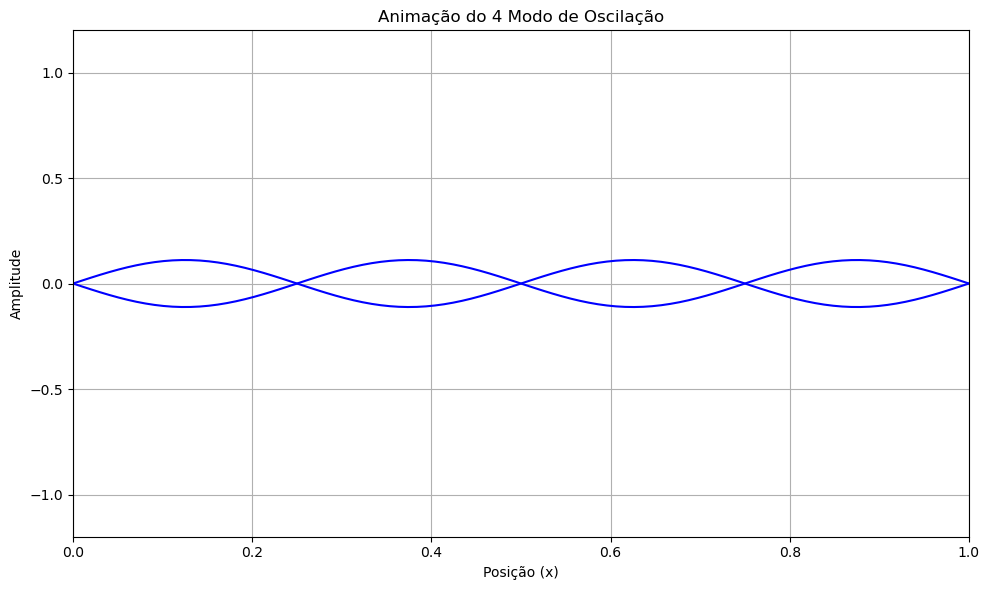

Frequência angular (ω) do 4 modo: 12.5579 rad/s
Período de oscilação: 0.5003 s


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Parâmetros do sistema
N = 100
L = 1.0
dx = L / (N - 1)
x = np.linspace(0, L, N) 


diagonal = -2 * np.ones(N-2)
diagonal_2 = np.ones(N-3)
D = (-1 / dx**2) * (np.diag(diagonal) + np.diag(diagonal_2, 1) + np.diag(diagonal_2, -1))

autovalores, autovetores = np.linalg.eigh(D)

# Frequências de oscilação
omegas = np.sqrt(autovalores)


for modo in range(4):
    psi = autovetores[:, modo]
    psi = np.concatenate(([0], psi, [0]))
    omega = omegas[modo]


    # Criar animação do modo oscilando
    fig, ax = plt.subplots(figsize=(10, 6))
    envoltoria_positiva, = ax.plot(x, psi)
    envoltoria_negativa, = ax.plot(x, -psi)

    ax.set_xlim(0, L)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel('Posição (x)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Animação do {modo+1} Modo de Oscilação')
    ax.grid(True)

    # Função de atualização para animação
    def update(frame):
        t = frame * 0.05  # Controla a velocidade da animação
        amplitude = np.cos(omega * t)
        y = psi * amplitude
        envoltoria_positiva.set_ydata(y)
        envoltoria_negativa.set_ydata(-y)
        envoltoria_positiva.set_color('blue')
        envoltoria_negativa.set_color('blue')
        return envoltoria_positiva,envoltoria_negativa,

    ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

    # Salvar a animação como GIF 
    ani.save(f'{modo+1}_modo.gif', writer='pillow', fps=20)

    plt.tight_layout()
    plt.show()

    # Informações sobre o modo
    print(f"Frequência angular (ω) do {modo+1} modo: {omega:.4f} rad/s")
    print(f"Período de oscilação: {2*np.pi/omega:.4f} s")